[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



(a) Hair color
(b) Height
(c) Number of children
(d) Wind speed

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [2]:
import pandas as pd
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")

Part a. Construct a histogram of CO2 emissions. 

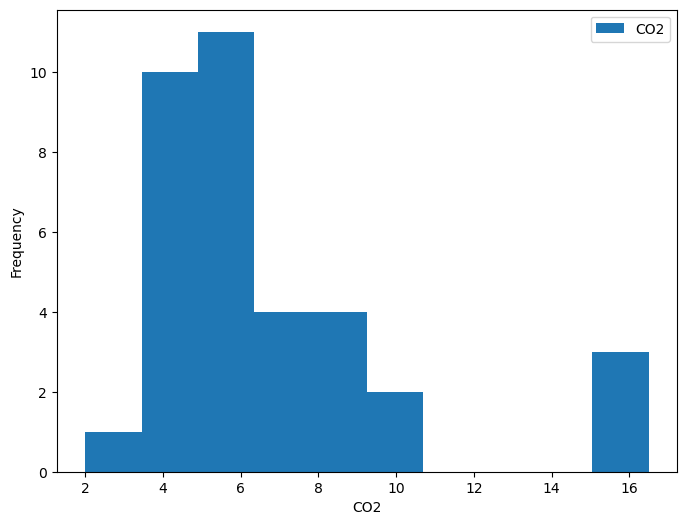

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
carbon_west.plot.hist(ax=ax)
plt.xlabel("CO2")
plt.show()


Part b. Find the mean, median, and standard deviation. 

In [15]:
count, avg, std, minimum, first, median, third, maximum = carbon_west['CO2'].describe()
print("mean: ", avg)
print("median: ", median)
print("std: ", std)

mean:  6.717142857142858
median:  5.9
std:  3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). 

In [3]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [15]:
import numpy as np
no_dc = murders[murders["state"] != "DC"]
print("mean:", np.mean(no_dc["murder"]))
print("std:", np.std(no_dc["murder"]))

mean: 4.874
std: 2.560297638947472


Part b. Find the five-number  summary without D.C. 

In [27]:
print(no_dc.describe().loc[['min', '25%', '50%', '75%', 'max']])

     murder
min   1.000
25%   2.625
50%   4.850
75%   6.175
max  12.400


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [29]:
print(murders.describe().loc[['mean', 'min', '25%', '50%', '75%', 'max']])

,murder
mean,5.252941
min,1.000000
25%,2.650000
50%,5.000000
75%,6.450000
max,24.200000


> The mean is affected more than the median by outliers, and the range is affected more than the inter-quartile range.

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [4]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home. 

Part b. Find the correlation between the two variables.

Part c. Find and plot the regression line on top of the scatterplot. 

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new. 

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness. 

In [ ]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")